# Машинное обучение, MDS

## НИУ ВШЭ, 2025-26 учебный год

# Дополнительные материалы 2. Advanced visualizations

## Раздел 1. Matplotlib, Seaborn - best practices

В данном разделе мы с вами снова вернемся к библиотекам Matplotlib и Seaborn, которые первично уже обсудили, и посмотрим еще больше примеров довольно мощных вещей, которые можно реализовать с помощью визуализаций в этих библиотеках. А пока будем этим заниматься, заодно по ходу дела изучим и еще ряд возможностей и инструментов. Поехали! :)


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# магическая функция, чтобы графики отображались в блокноте под ячейками
%matplotlib inline

### Мультивариативный график рассеяния

Один из очень мощных инструментов визуализаций — мультивариантивный график рассеяния (multivariate scatter plot). Точное определение мы с вами обсудим чуть ниже, а пока для начала давайте изучим датасет, на основе которого мы познакомимся с данным инструментом, — данные по преступлениям в различных штатах США.

Указанный датасет (crimeRatesByState2005.tsv) содержит информацию о количестве преступлений в США в 2005 году.

In [ ]:
crimes = pd.read_csv('crimeRatesByState2005.tsv', sep='\t')  # тут разделитель - тоже табуляция
crimes.head()

,state,murder,Forcible_rate,Robbery,aggravated_assult,burglary,larceny_theft,motor_vehicle_theft,population
0,Alabama,8.2,34.3,141.4,247.8,953.8,2650.0,288.3,4627851
1,Alaska,4.8,81.1,80.9,465.1,622.5,2599.1,391.0,686293
2,Arizona,7.5,33.8,144.4,327.4,948.4,2965.2,924.4,6500180
3,Arkansas,6.7,42.9,91.1,386.8,1084.6,2711.2,262.1,2855390
4,California,6.9,26.0,176.1,317.3,693.3,1916.5,712.8,36756666


In [ ]:
crimes.shape

(50, 9)

In [ ]:
crimes.describe()

,murder,Forcible_rate,Robbery,aggravated_assult,burglary,larceny_theft,motor_vehicle_theft,population
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,5.000000e+01
mean,4.714000,33.800000,102.754000,260.350000,691.316000,2295.658000,362.834000,6.067118e+06
std,2.366347,11.379825,57.319795,132.656168,236.066567,516.879959,207.848335,6.748996e+06
min,1.100000,13.900000,7.400000,61.700000,311.900000,1343.700000,102.000000,5.326680e+05
25%,2.550000,26.125000,66.000000,150.750000,492.400000,1853.575000,214.975000,1.791191e+06
50%,4.700000,33.300000,95.400000,231.750000,665.150000,2353.150000,317.800000,4.340020e+06
75%,6.575000,40.250000,150.075000,353.675000,924.650000,2697.975000,419.075000,6.536963e+06
max,9.900000,81.100000,256.700000,579.000000,1201.100000,3308.400000,1115.200000,3.675667e+07


Давайте начнем с графика с двумя переменным. Тут все просто - непрерывная переменная по x, непрерывная переменная по y: а точка на пересечении значений x и y - место нашего штата в этой системе  координат. Давайте для начала построим график для убийств и ограблений. График рассеяния можно использовать и для категориальных переменных - посмотрим на другом примере.

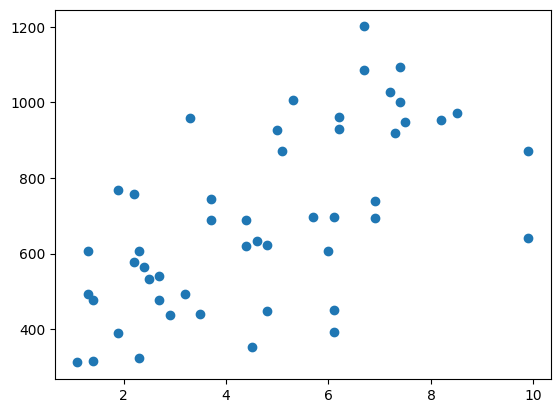

In [ ]:
fig, ax = plt.subplots()  # если нужно создать один график, то можем не указывать количество в аргументах
ax.scatter(crimes['murder'], crimes['burglary']);  # вместо метода plot используем scatter

Попробуйте проинтерпретировать график выше!

Дальше мы попробуем закодировать в нем еще две переменные. Есть идеи как?

Мульвариативный график — это такой график, из которого мы можем считать значения для более чем двух переменных. Самый простой способ закодировать дополнительную информацию — цвет и размер точки. Давайте добавим значение переменной population (размер населения штата) на график как размер точки.

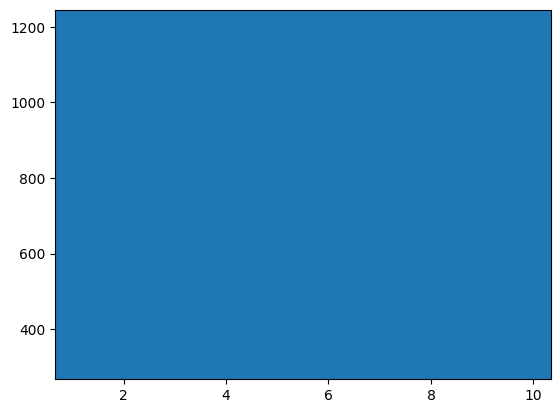

In [ ]:
fig, ax = plt.subplots()

# добавляем параметр s (size) и говорим, какая переменная будет за него отвечать
ax.scatter(crimes['murder'], crimes['burglary'], s = crimes['population']);

Воу! Размер населения такой большой, что точка захватила всю область координат. Давайте попробуем нашу переменную масштабировать — нам же важны относительные размеры штатов относительно друг друга, а не абсолютные значения. Значения масштабирования тоже выбираем экспериментально: то, что лучше выглядит и более информативно.

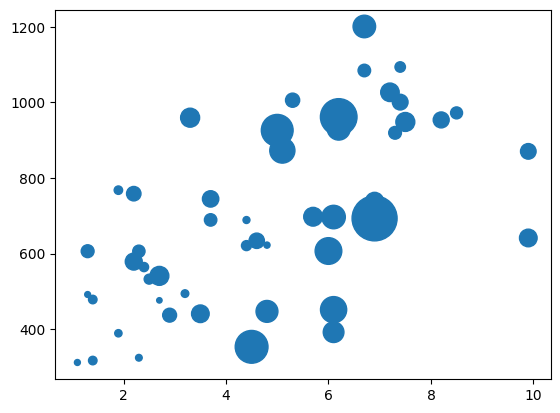

In [ ]:
fig, ax = plt.subplots()
ax.scatter(crimes['murder'], crimes['burglary'], s = crimes['population']/35000);

Класс, только некоторые точки слились. Давайте добавим параметр прозрачности, чтобы было видно, где они накладываются друг на друга.

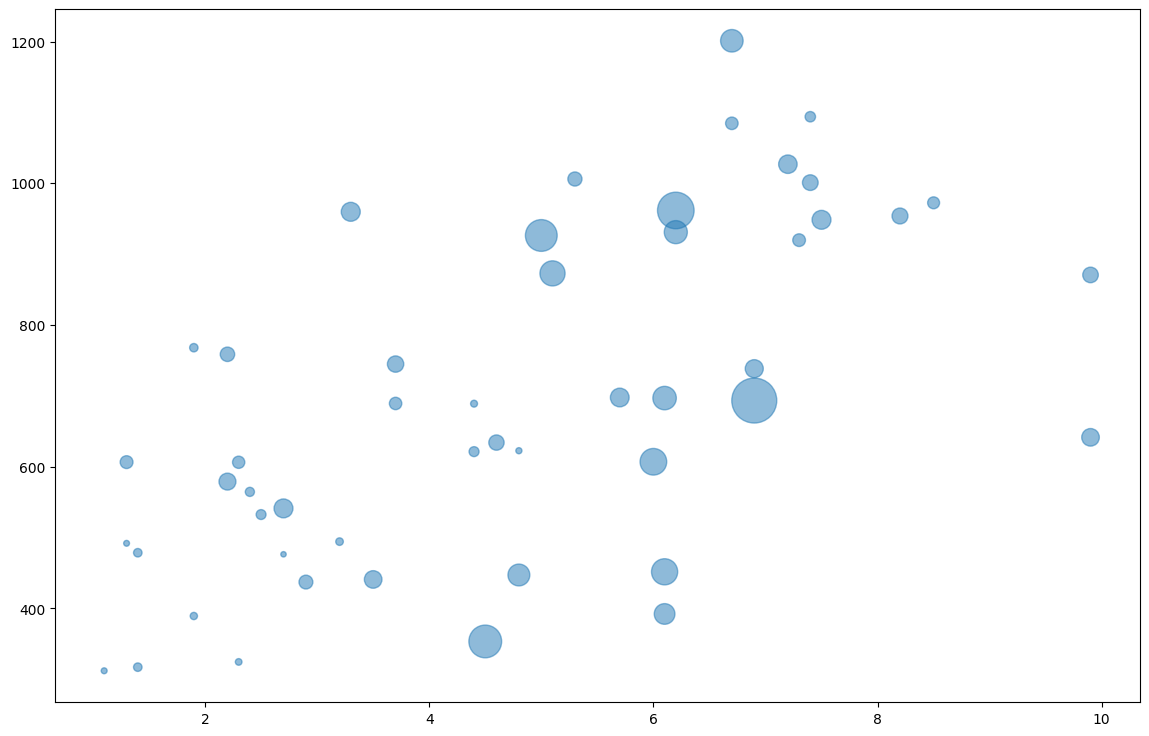

In [ ]:
fig, ax = plt.subplots(figsize=(14,9))
ax.scatter(crimes['murder'],
           crimes['burglary'],
           s=crimes['population'] / 35000,
           alpha=0.5);  # параметр alpha задает прозрачность точки от 0 до 1

Давайте попробуем проинтерпретировать этот график. А потом добавим еще какую-нибудь переменную в виде цвета.

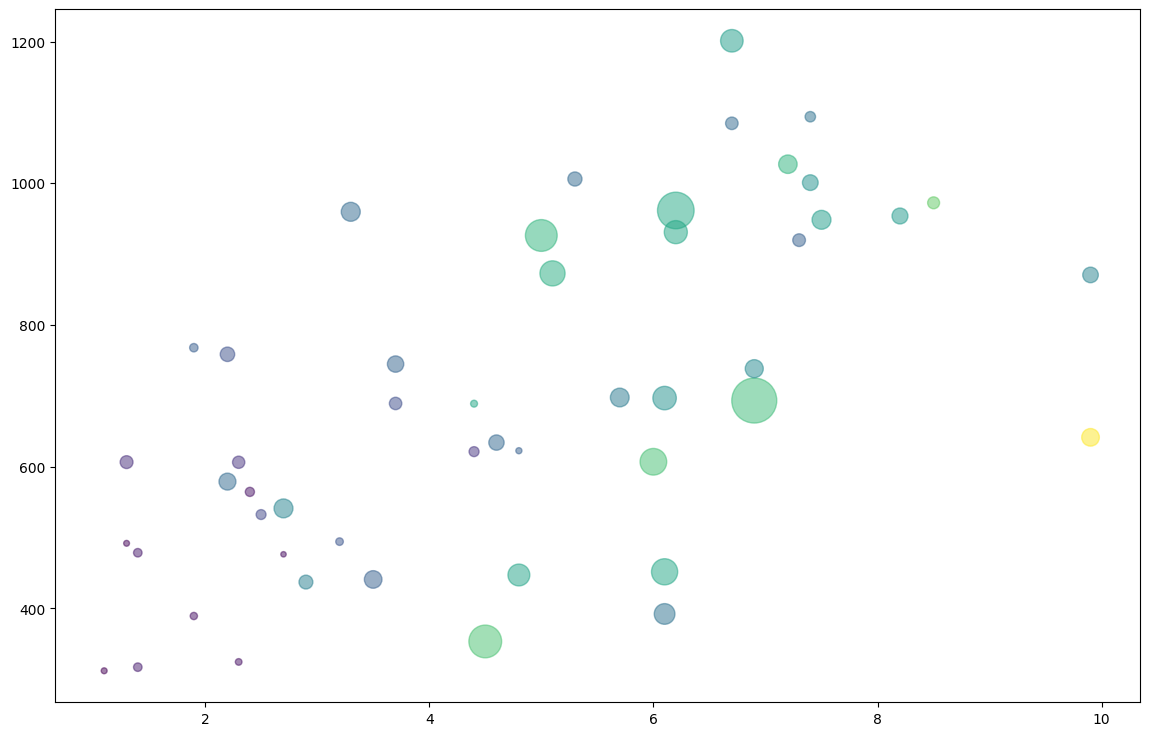

In [ ]:
fig, ax = plt.subplots(figsize=(14,9))
ax.scatter(
    crimes['murder'],
    crimes['burglary'],
    s=crimes['population'] / 35000,
    alpha=0.5,
    c=crimes['Robbery']
);  # задаем новый аргумент c (color) и присваиваем ему значение переменной

Осталось узнать, что значит какой цвет. Для этого нужно сохранить график в переменную и передать ее как аргумент функции colorbar().
Также можем поменять цветовую шкалу с помощью аргумента cmap (какие цветовые карты есть в matplotlib? Гуглим документацию!).

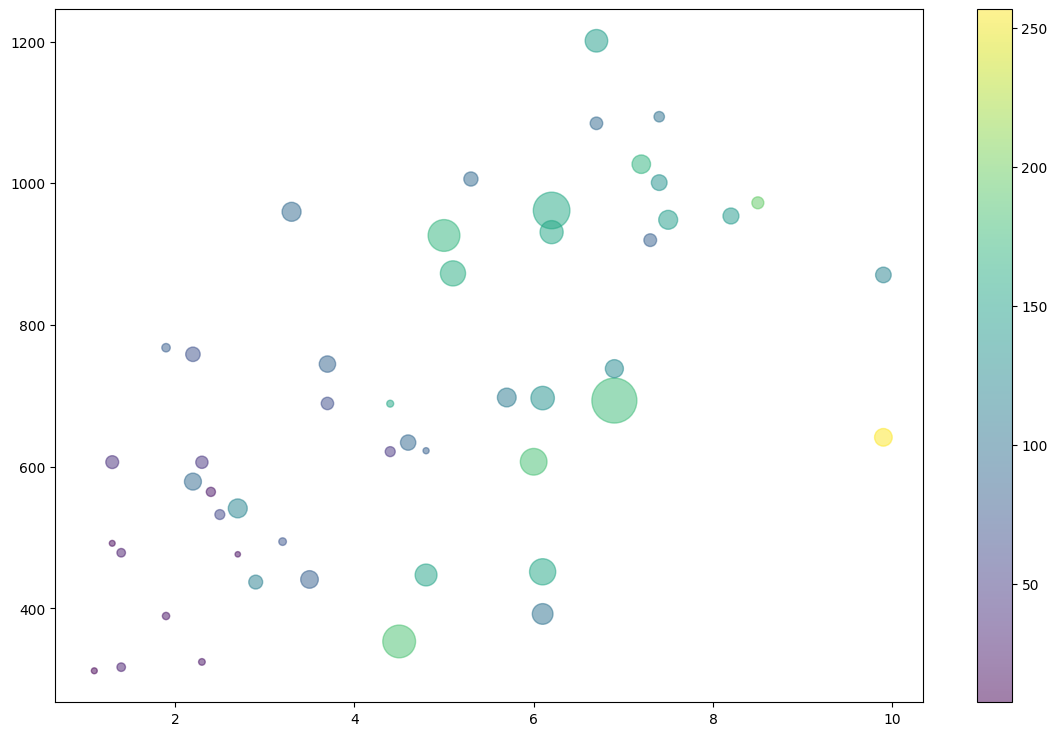

In [ ]:
fig, ax = plt.subplots(figsize=(14,9))
color_graph = ax.scatter(crimes['murder'],
                         crimes['burglary'],
                         s=crimes['population'] / 35000,
                         alpha=0.5,
                         cmap='viridis',
                         c=crimes['Robbery'])
plt.colorbar(color_graph);

Проинтерпретируем?

Давайте сделаем теперь еще посимпатичнее и подпишем штаты!

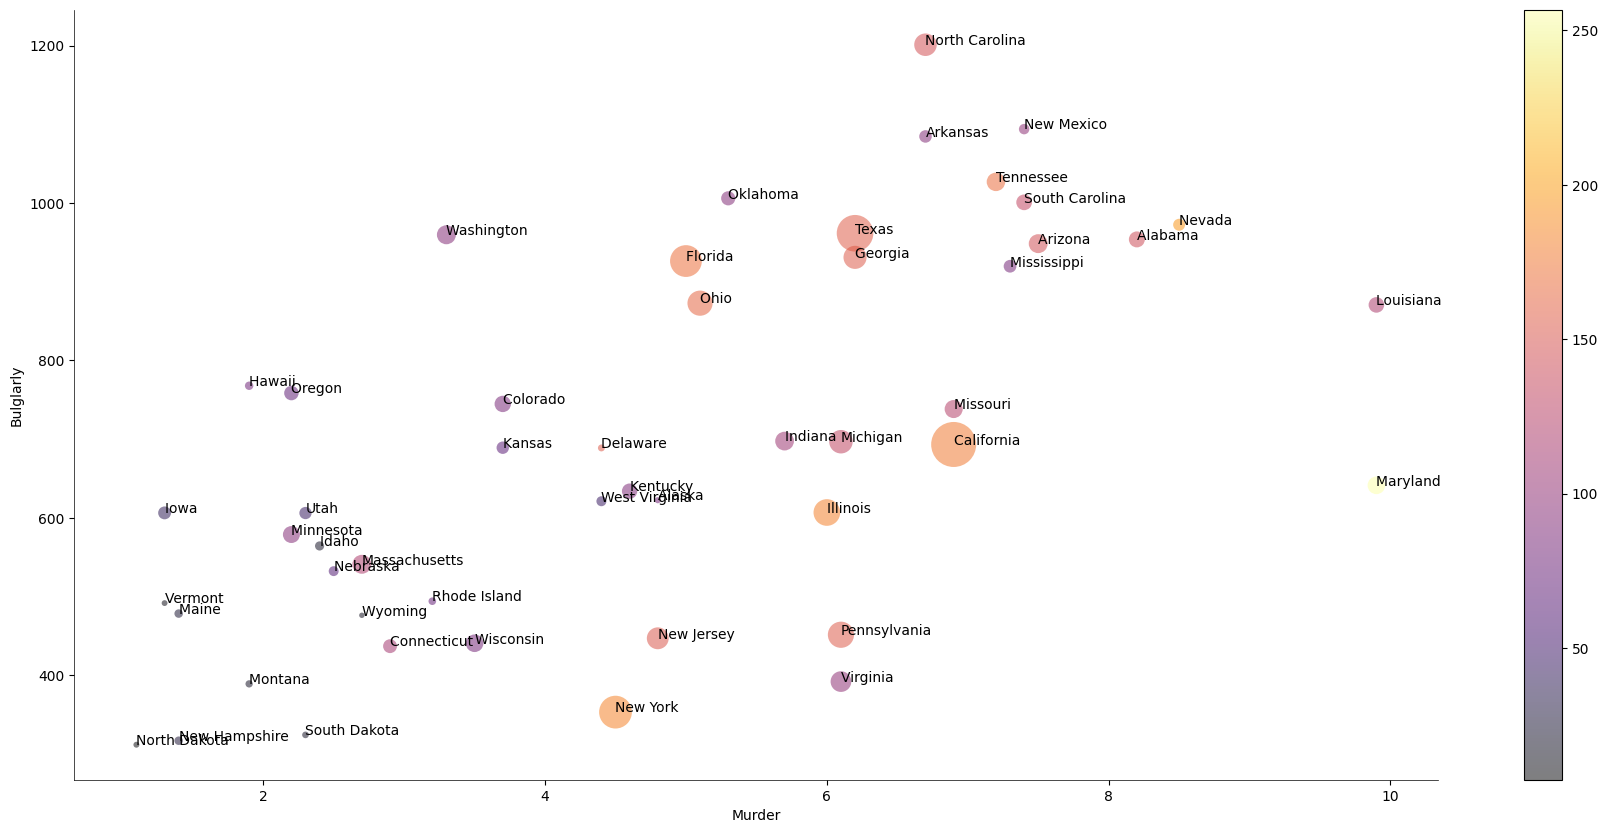

In [ ]:
fig, ax = plt.subplots(figsize=(22, 10))

color_graph = ax.scatter(crimes['murder'],
                         crimes['burglary'],
                         s=crimes['population'] / 35000,
                         c=crimes['Robbery'],
                         cmap='inferno',
                         alpha=0.5,
                         linewidth=0)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

ax.spines['left'].set_linewidth(0.5)
ax.spines['bottom'].set_linewidth(0.5)

ax.set_xlabel('Murder', fontsize=10)
ax.set_ylabel('Bulglarly', fontsize=10)

for i, state in enumerate(
        crimes['state']
):  # с помощью enumerate создаем из колонок с названиями штатов объект кортежей вида индекс - название штата.
    ax.annotate(
        state, (crimes['murder'][i], crimes['burglary'][i]), fontsize=10
    )  # используем метод annotate, которому говорим, что нужно брать имя штата
    # из кортежа, который создали с помощью enumerate, а координаты подписи задаем через
    # значения наших переменных x и y для нужного индекса из объекта enumerate (обращается к нужному
    # ряду в датафрейме)

plt.colorbar(color_graph)
plt.savefig('crimes.png')  # сохраняем

In [ ]:
# смотрим что внутри объекта enumerate()
list(enumerate(crimes['state']))

[(0, 'Alabama '),
 (1, 'Alaska '),
 (2, 'Arizona '),
 (3, 'Arkansas'),
 (4, 'California '),
 (5, 'Colorado '),
 (6, 'Connecticut '),
 (7, 'Delaware '),
 (8, 'Florida '),
 (9, 'Georgia '),
 (10, 'Hawaii '),
 (11, 'Idaho '),
 (12, 'Illinois '),
 (13, 'Indiana '),
 (14, 'Iowa '),
 (15, 'Kansas  '),
 (16, 'Kentucky  '),
 (17, 'Louisiana '),
 (18, 'Maine '),
 (19, 'Maryland '),
 (20, 'Massachusetts'),
 (21, 'Michigan'),
 (22, 'Minnesota '),
 (23, 'Mississippi '),
 (24, 'Missouri '),
 (25, 'Montana  '),
 (26, 'Nebraska '),
 (27, 'Nevada '),
 (28, 'New Hampshire '),
 (29, 'New Jersey'),
 (30, 'New Mexico '),
 (31, 'New York'),
 (32, 'North Carolina '),
 (33, 'North Dakota '),
 (34, 'Ohio '),
 (35, 'Oklahoma '),
 (36, 'Oregon '),
 (37, 'Pennsylvania'),
 (38, 'Rhode Island '),
 (39, 'South Carolina '),
 (40, 'South Dakota '),
 (41, 'Tennessee '),
 (42, 'Texas '),
 (43, 'Utah'),
 (44, 'Vermont '),
 (45, 'Virginia '),
 (46, 'Washington '),
 (47, 'West Virginia '),
 (48, 'Wisconsin '),
 (49, 'Wyom

Ну как вам? :)

### График рассеяния на аггрегированном датасете (возможности анимации)

Следующий небольшой пример сделаем на датасете проекта gapminder — это набор социо-экономических индикаторов для ряда стран за 200 лет. Мы возьмем небольшой срез набора данных с 1957 года с шагом пять лет и две переменные — ВВП на душу населения (gdp per capita) и продолжительность жизни.

www.gapminder.org

In [ ]:
gapminder = pd.read_csv('gapminderData.csv')
gapminder.head()

,country,year,pop,continent,lifeExp,gdpPercap
0,Afghanistan,1952,8425333.0,Asia,28.801,779.445314
1,Afghanistan,1957,9240934.0,Asia,30.332,820.853030
2,Afghanistan,1962,10267083.0,Asia,31.997,853.100710
3,Afghanistan,1967,11537966.0,Asia,34.020,836.197138
4,Afghanistan,1972,13079460.0,Asia,36.088,739.981106


In [ ]:
gapminder.shape

(1704, 6)

In [ ]:
gapminder.year.values  # смотрим, какие значения есть в колонке год

array([1952, 1957, 1962, ..., 1997, 2002, 2007])

Сделаем колонку continent категориальной.

In [ ]:
gapminder['continent'] = pd.Categorical(gapminder['continent'])

In [ ]:
gapminder['continent'].cat.codes  # теперь у нас есть такая числовая разметка категорий, которую мы сможем скормить переменной графика

,0
0,2
1,2
2,2
3,2
4,2
...,...
1699,0
1700,0
1701,0
1702,0


In [ ]:
d = dict(enumerate(gapminder['continent'].cat.categories))
print(d)

{0: 'Africa', 1: 'Americas', 2: 'Asia', 3: 'Europe', 4: 'Oceania'}


In [ ]:
gapminder['continent'].unique()

['Asia', 'Europe', 'Africa', 'Americas', 'Oceania']
Categories (5, object): ['Africa', 'Americas', 'Asia', 'Europe', 'Oceania']

Еще для нас с вами было бы нелишним логарифмировать переменную gpd. Многие переменные, связанные, например, с доходом, имеют логарифмическое распределение (что логично — у нас очень много людей или стран с каким-то небольшим достатком и есть очень длинный хвост наблюдений с большими значениями по шкале).


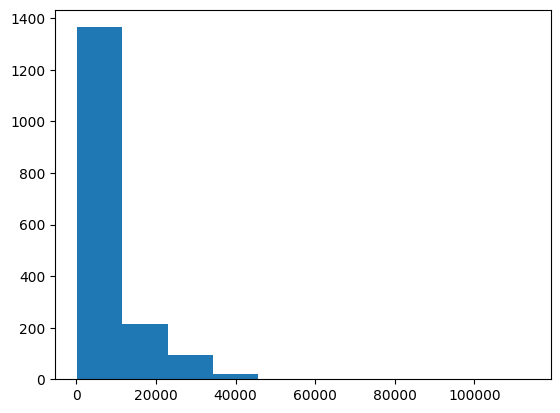

In [ ]:
plt.hist(gapminder['gdpPercap']);

C логарифмированием шкалы мы избавимся от длинного хвоста (ниже посмотрим, как это влияент на график.)
Насчет логарифмированных шкал нужно волноваться в статистических моделях, потому что от этого у вас поменяется интерпретация коэффицентов. Сейчас нам достаточно понимать, что у стран, находящихся правее по шкале — ВВП на душу населения выше.

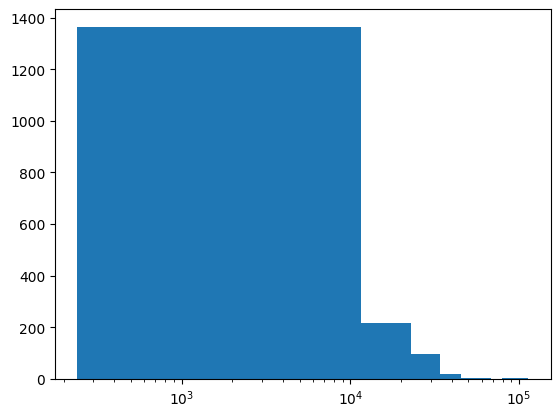

In [ ]:
plt.hist(gapminder['gdpPercap'])
plt.xscale('log')

#### Задание для самостоятельного решения (scatter plot)

Сейчас в наборе данных у нас есть каждая страна в каждый год с 1952 по 2007.
Давайте сделаем срез для 1952 года и попробуем построить график рассения (почти то же самое, что делали выше):

* x - доход
* y - продолжительность жизни
* размер - население
* цвет - континент

Не забудьте подписать шкалы x и y, а также сам график в целом!


In [ ]:
# your code here

Ну что же! Давайте смотреть решение!

Пример без лог-преобразования шкалы x:

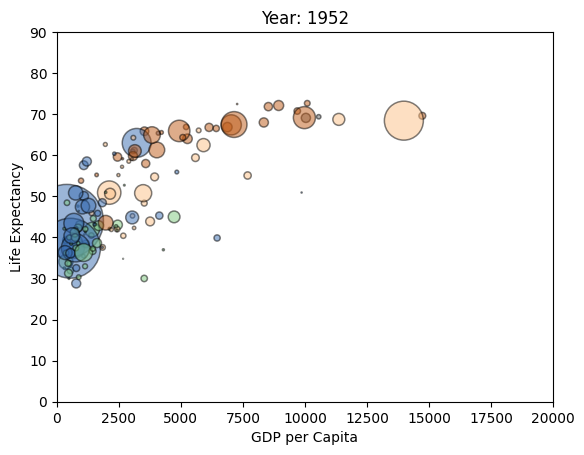

In [ ]:
tmp = gapminder[gapminder.year == 1952]

plt.scatter(tmp['gdpPercap'], tmp['lifeExp'], s = tmp['pop']/200000,
            c=tmp['continent'].cat.codes, cmap= "Accent", alpha=0.5,
            edgecolors="black", linewidth=1.1) # добавили два новых аргумента - цвет и обводка границ точек.

plt.xlabel("GDP per Capita")
plt.ylabel("Life Expectancy")
plt.title("Year: "+str(1952))  # заголовок графика
plt.ylim(0, 90)  # давайте еще добавим лимиты шкал, чтобы шкала не менялась, когда мы будем строить графики для других годов
plt.xlim(0,20000);

То же самое, но с лог-преобразованием:

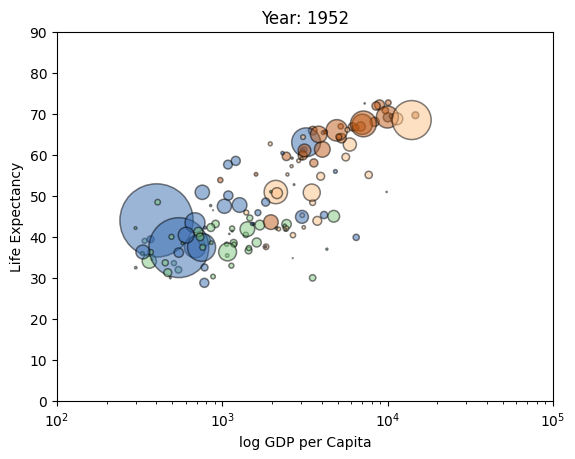

In [ ]:
tmp = gapminder[gapminder.year == 1952]
plt.scatter(tmp['gdpPercap'],
            tmp['lifeExp'],
            s=tmp['pop'] / 200000,
            c=tmp['continent'].cat.codes,
            cmap="Accent",
            alpha=0.5,
            edgecolors="black",
            linewidth=1.1)
plt.xscale('log')
plt.xlabel("log GDP per Capita")
plt.ylabel("Life Expectancy")
plt.title("Year: " + str(1952))
plt.ylim(0, 90)
plt.xlim(100, 100000);# меняем лимиты для лог-шкалы

А теперь давайте автоматизируем эту красоту, чтобы получить график для каждой пятилетки с 1952 до 2007. Потом при желании мы можем их собрать в gif в какой-нибудь программе и получить анимированный график.

In [ ]:
gapminder['year'].unique()

array([1952, 1957, 1962, 1967, 1972, 1977, 1982, 1987, 1992, 1997, 2002,
       2007])

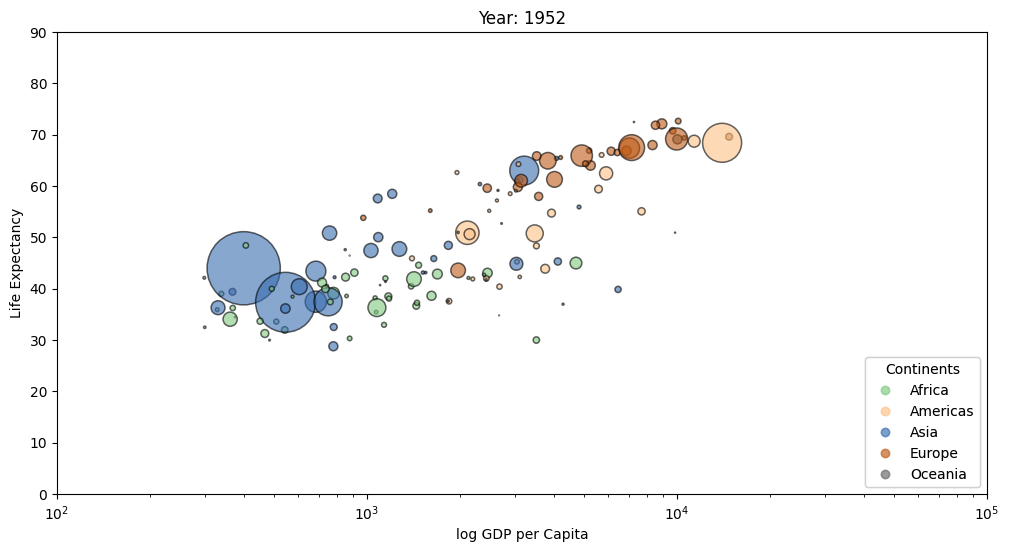

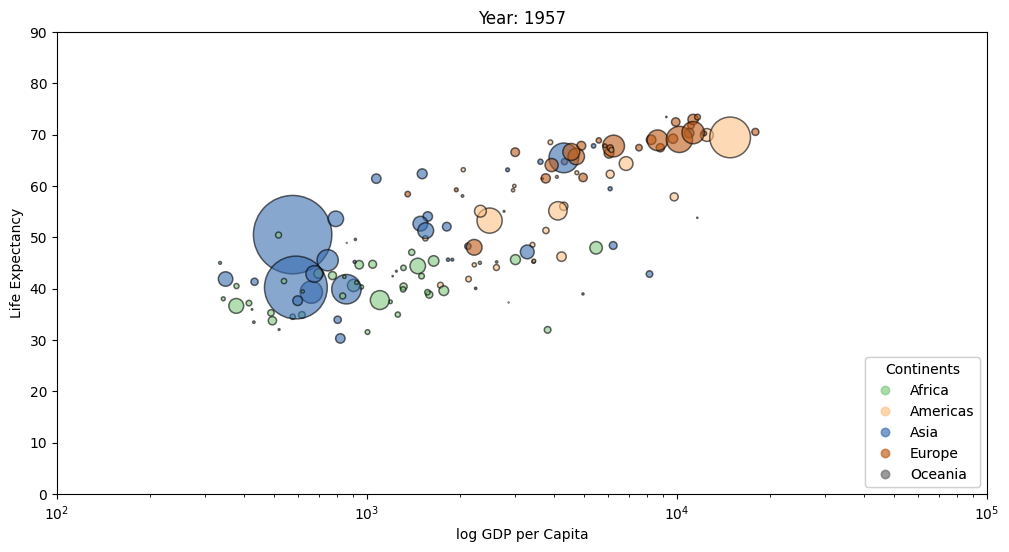

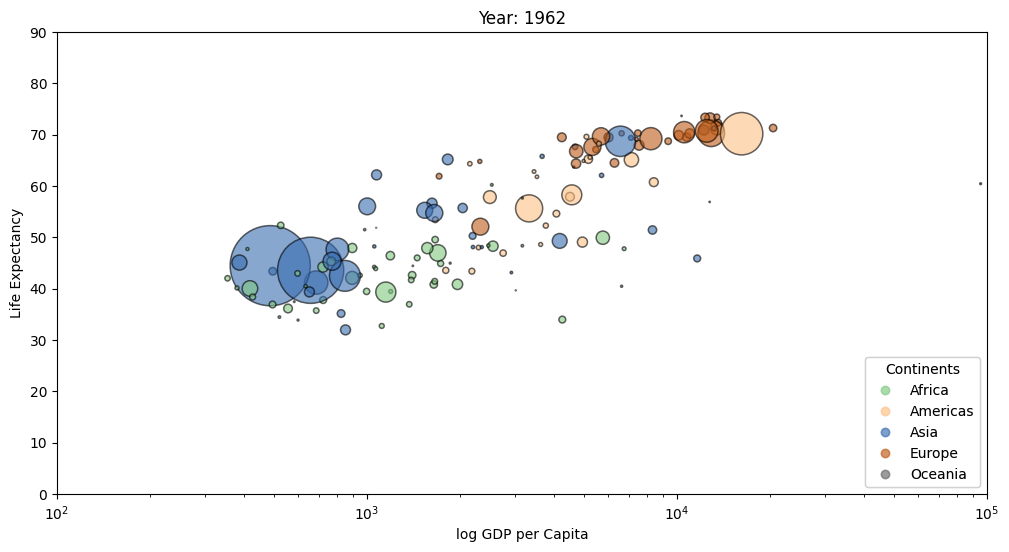

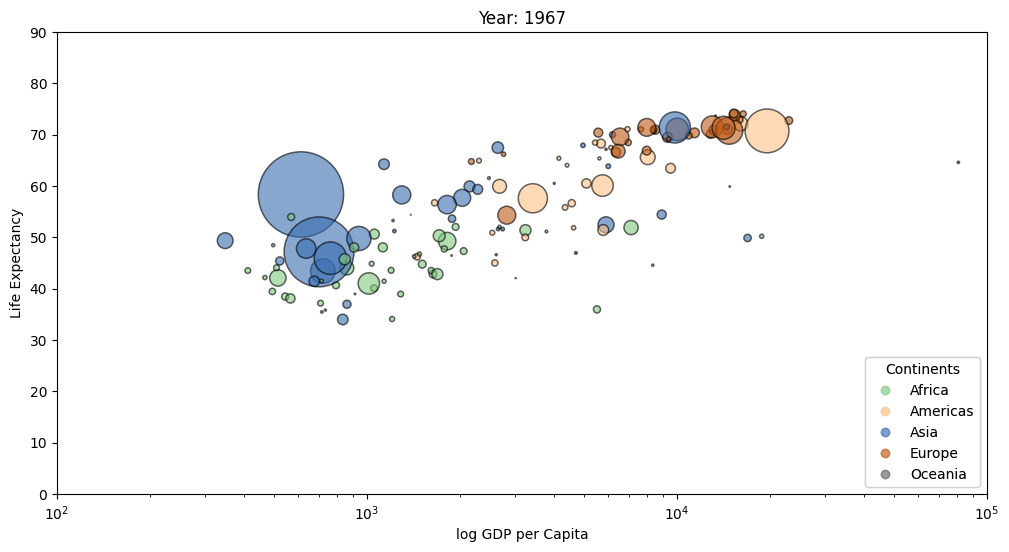

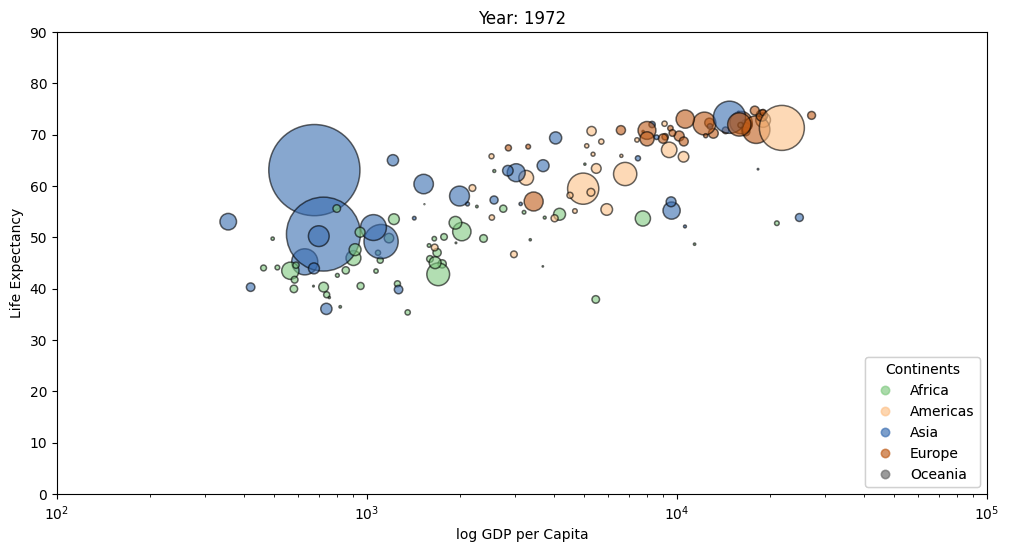

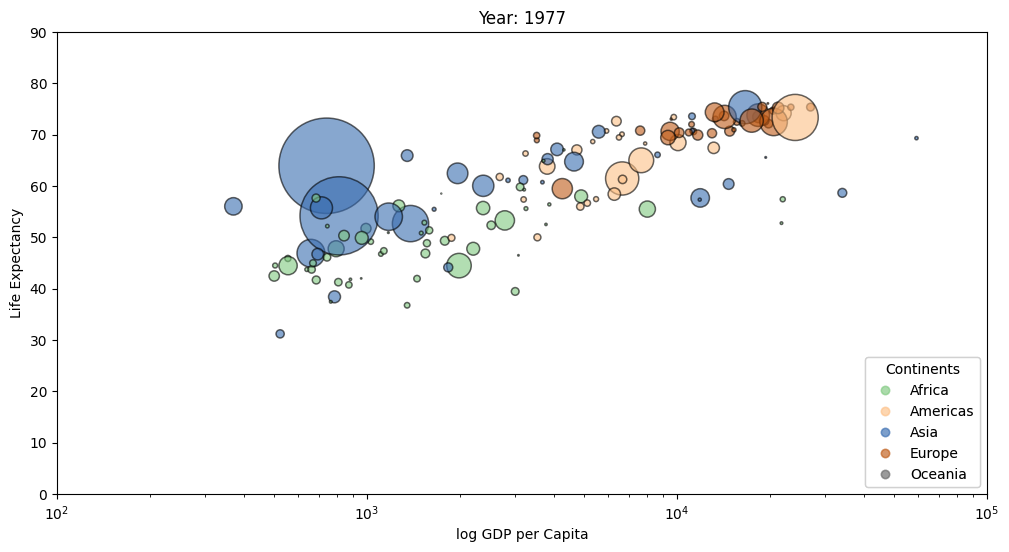

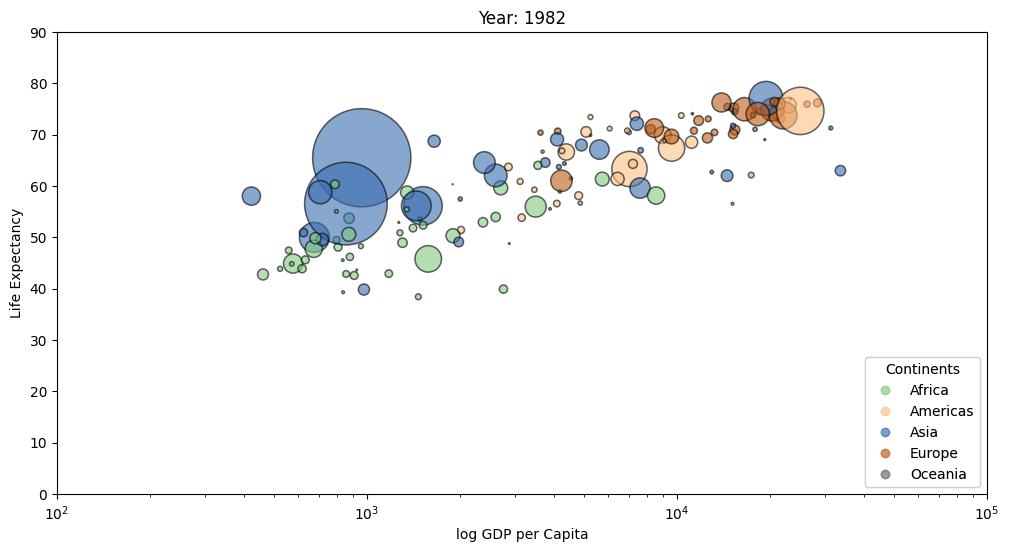

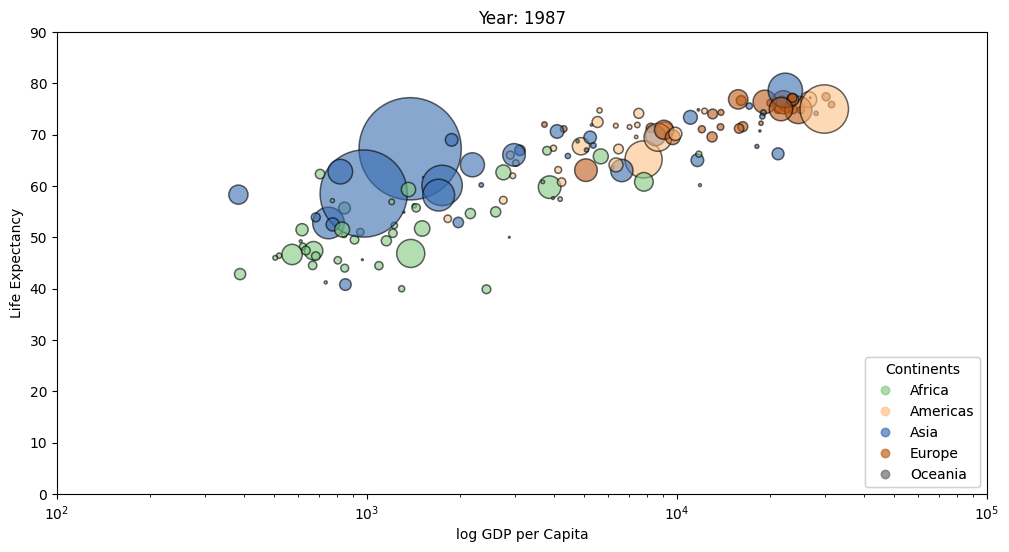

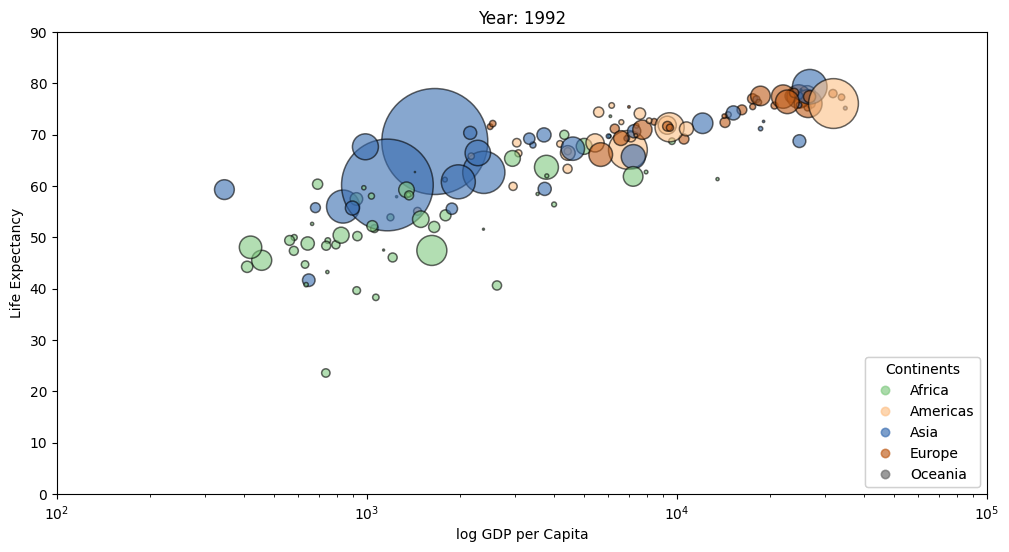

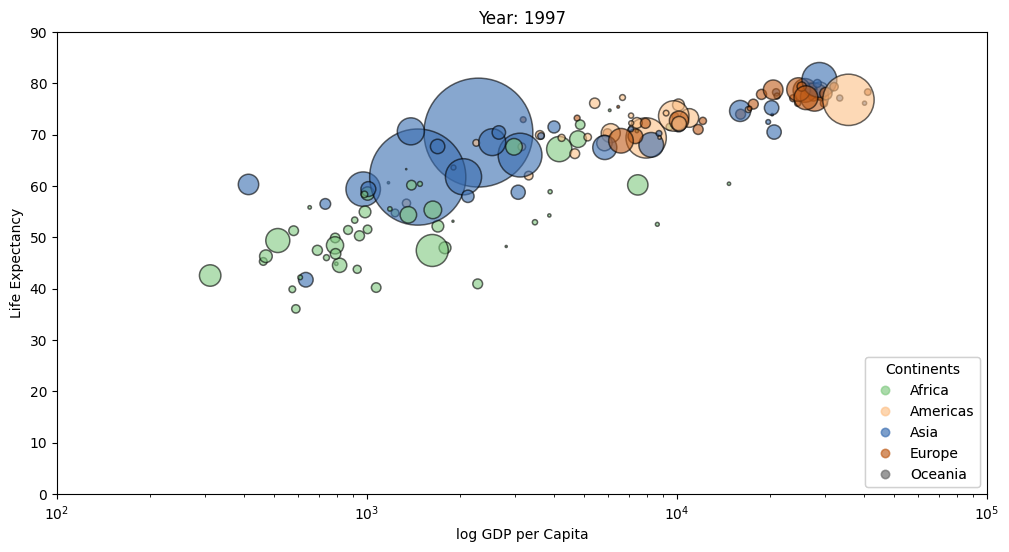

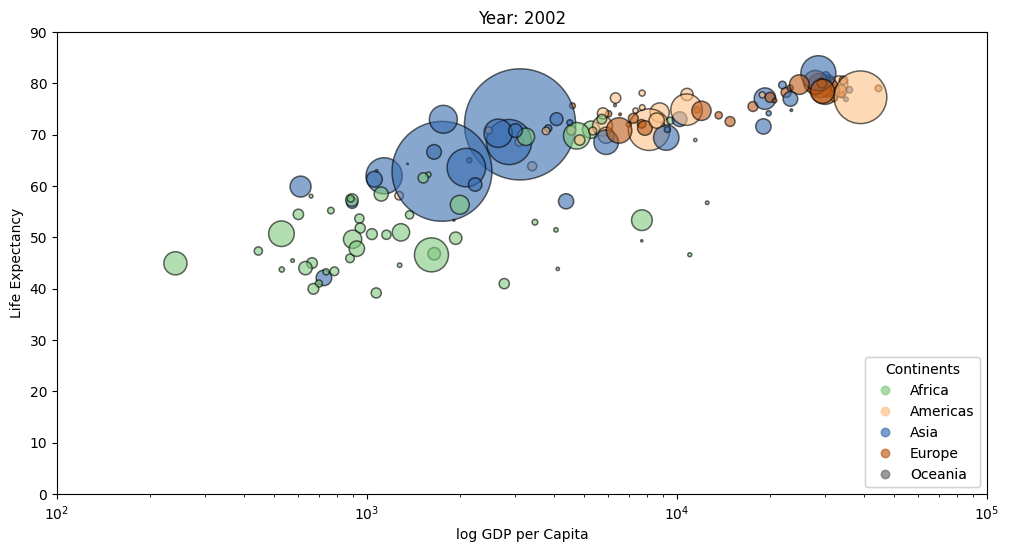

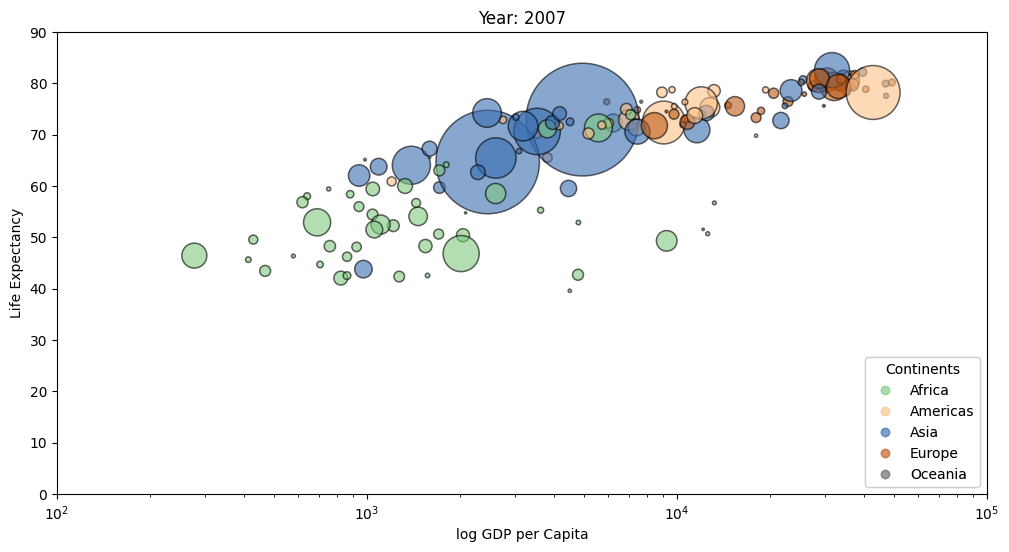

In [ ]:
for i in gapminder.year.unique(): # пишем цикл, который проходит по всем уникальным значениям в колонке год

    # создаем фигуру
    fig, ax = plt.subplots(figsize=(12, 6))

    tmp = gapminder[gapminder.year == i]  # создаем срез датафрейма для года на данной итерации
    scatter = ax.scatter(tmp['gdpPercap'], tmp['lifeExp'], s=tmp['pop']/200000 ,
                c=tmp['continent'].cat.codes, cmap="Accent", alpha=0.6, edgecolors="black", linewidth=1.1)

    plt.xscale('log')
    plt.xlabel("log GDP per Capita")
    plt.ylabel("Life Expectancy")
    plt.title("Year: "+str(i))
    plt.ylim(0, 90)
    plt.xlim(100,100000)

    handles = scatter.legend_elements(num=[0,1,2,3,4])[0]

    legend = ax.legend(handles=handles, labels=d.values(),
                    loc="lower right", title="Continents")
    ax.add_artist(legend)


## Раздел 2. Интерактивные визуализации в Plotly

А теперь, когда мы перешли с вами к разделу 2, признаемся честно: ближайший раздел будет выглядеть как "Я не знаю, как и почему это работает, но это просто офигенно!! 😍"

Plotly — крайне сложная для первичного освоения библиотека визуализаций, которая при этом выдает графики потрясающе высокого качества. (Иными словами, усилий на нее затрачивается много, но они — с лихвой окупятся!)

В отличие от библиотеки Seaborn — Plotly не основана в такой же степени на Matplotlib и в ряде вещей представляет свой собственный уникальный синтаксис и характер написания кода.

Итак, приступим!


In [ ]:
!pip install plotly

In [ ]:
import plotly
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd
import numpy as np

### Простые графики в Plotly

Синтаксис plotly несколько отличается от того, что мы уже видели в matplotlib.

Здесь мы передаем данные для графиков функции из библиотеки plotly.graph_objects, которую мы импортировали как go, и потом эти графики передаем функции go.Figure, которая собственно рендерит наш график.

In [ ]:
our_data = [2, 3, 1] # задаем данные

our_bar = go.Bar(y = our_data) # передаем данные объекту Bar, говорим, что наши данные, это величина категории по шкале y
fig = go.Figure(data = our_bar) # передаем наш бар объекту Figure, который уже рисует график (ура, что-то знакомое!)


fig.show() # выводим график

А теперь давайте представим, что наши данные разбиты по какой-то категориальной переменной.

In [ ]:
trace0 = go.Bar(y = [2, 3, 1])
trace1 = go.Bar(y = [4, 7, 3])

our_data = [trace0, trace1] # когда объектов больше одного - передаем их списком

fig = go.Figure(data = our_data)
fig.show()

Теперь попробуем построить что-то с координатами x и y. Такой график уже будет Scatter - у каждого нашего наблюдения есть координаты x и y.

In [ ]:
trace0 = go.Scatter(
    x=[1, 2, 3, 4],
    y=[10, 15, 13, 17]
)
trace1 = go.Scatter(
    x=[1, 2, 3, 4],
    y=[16, 5, 11, 9]
)
our_data = [trace0, trace1]

fig = go.Figure(data = our_data)

fig.show()

Давайте теперь попробуем построить графики для датасета для обитателей леса

In [ ]:
forest = pd.read_csv('populations.txt', sep = '\t')

In [ ]:
forest.head()

,year,hare,lynx,carrot
0,1900,30000.0,4000.0,48300
1,1901,47200.0,6100.0,48200
2,1902,70200.0,9800.0,41500
3,1903,77400.0,35200.0,38200
4,1904,36300.0,59400.0,40600


In [ ]:
trace0 = go.Bar(
    x=forest.year,
    y=forest.hare+forest.carrot+forest.lynx
)
trace1 = go.Bar(
    x=forest.year,
    y=forest.lynx
)
our_data = [trace0, trace1]

fig = go.Figure(data = our_data)

fig.show()

### Задание для самостоятельного решения (plotly)

Постройте график, который сравнивает популяции зайцев и морковки за все годы (используя `go.Scatter`)

In [ ]:
# your code here

Итак, решение:

In [ ]:
# упражнение 1

trace_hare = go.Scatter(
    x=forest.year,
    y=forest.hare
)
trace_carrot = go.Scatter(
    x=forest.year,
    y=forest.carrot
)
our_data = [trace_hare, trace_carrot]

fig = go.Figure(data = our_data)

fig.show()

А теперь давайте построим эти два графика рядом.

Обратите внимание, plotly считает с 1, а не с 0, как мы привыкли.

In [ ]:
type(trace_carrot)

plotly.graph_objs._scatter.Scatter

In [ ]:
fig = make_subplots(rows=2, cols=1)

trace_carrot = go.Scatter(
    x=forest.year,
    y=forest.carrot
)

trace_hare = go.Scatter(
    x=forest.year,
    y=forest.hare
)

trace_all = go.Bar(
    x=forest.year,
    y=forest.hare + forest.lynx + forest.carrot
)

trace_lynx = go.Bar(
    x=forest.year,
    y=forest.lynx
)

fig.add_trace(trace_carrot, row=1, col=1)
fig.add_trace(trace_hare, row=1, col=1)
fig.add_trace(trace_all, row=2, col=1)
fig.add_trace(trace_lynx, row=2, col=1)


### Оформление графиков

В библиотеке Plotly за данные внутри оси координаты и всю "красоту" (подписи, шкалы, фон, сетка и т.д.) отвечают два разных объекта — data и layout.

`fig = go.Figure(data = our_data)`

Здесь объект data принимает данные, из которых figure построит нам график. Как мы увидим ниже, аттрибуты данных тоже настраиваются в объекте данных (например, цвет или размер точек).

За внешний вид этого графика отвечает layout — там довольно много параметров, которые можно настроить, которые задаются через словари, где ключ — параметр, а значение — то, как мы хотим его изменить (текст, числовое значение и т.д.).

https://plot.ly/python/reference/ — здесь можно посмотреть, какие типы графиков вообще есть и какие параметры можно настраивать в каждом из них.

В объект layout мы передаем словарь, где ключ — ключевое слово, а значение — то, что мы ему присваиваем. Обратите внимание, в синтаксе ниже показаны три варианта, как это можно записать. Все они эквивалентны.

In [ ]:
trace0 = go.Scatter(
    x=[1, 2, 3, 4],
    y=[10, 15, 13, 17]
)

our_data = [trace0]
our_layout = dict(title = 'A simple line')
# our_layout = {'title' : 'A simple line'}
# our_layout = go.Layout(title = 'A simple line')

# после того, как создали отдельно объекты и для data, и для layout, передаем их функции go.Figure()
fig = go.Figure(data=our_data, layout=our_layout)

fig.show()

Как уже говорилось, все, находящееся внутри осей координат и касающееся данных, настраивается внутри объекта, относящегося к данным.
Так, в объекте go.Scatter, который, по сути, создает словарь (вообще, почти все в plotly построено на синтаксисе словарей), мы можем прописать тип, цвет и размер маркеров, всплывающий текст и т.д. В layout подписываем шкалы x и y — обратите внимание, что внутри словаря некоторые параметры в свою очередь тоже словари :)

In [ ]:
trace0 = go.Scatter(
    x=[1, 2, 3, 4],
    y=[10, 15, 13, 17],
    marker={'color': 'red', 'symbol': 101, 'size': 10}, # атрибуты маркера - цвет, код символа, размер
    mode = 'lines+markers', # атрибуты графика. Здесь можно задать просто линию или маркеры, например
    text = ['one', 'two', 'three', 'four'], # подписи к точкам
    name = 'Red Trace' # имя в легенде
)

our_data = [trace0]

our_layout = go.Layout(
    title="First Plot",
    xaxis={'title':'x axis'}, # заголовки шкал
    yaxis={'title':'y axis'},
    height = 400,
    width = 700)

# после того, как создали отдельно объекты и для data, и для layout, передаем их функции go.Figure()
fig = go.Figure(data=our_data, layout=our_layout)

fig.show()

Давайте посмотрим, как наши объекты выглядят внутри

In [ ]:
# словари словарей!
our_data

[Scatter({
     'marker': {'color': 'red', 'size': 10, 'symbol': 101},
     'mode': 'lines+markers',
     'name': 'Red Trace',
     'text': [one, two, three, four],
     'x': [1, 2, 3, 4],
     'y': [10, 15, 13, 17]
 })]

In [ ]:
# при желании мы даже можем обратиться к объектам внутри по индексу
our_data[0]['marker']['symbol']

101

In [ ]:
our_layout

Layout({
    'height': 400,
    'title': {'text': 'First Plot'},
    'width': 700,
    'xaxis': {'title': {'text': 'x axis'}},
    'yaxis': {'title': {'text': 'y axis'}}
})

<hr>

### Мультивариативные графики рассеяния в Plotly

Вернемся к еще одному знакомому набору данных: вновь построим график рассеяния для данных по преступности в США, где по шкале x будет количество убийств (murder), по y — ограбления (burglary). За размер будет отвечать количество людей в штате (возможно, нуждается в масшатабировании), а за цвет — количество угнанных автомобилей. При наведении курсора на точку должно выводиться названия штата (обратите внимание на атрибут текст в примерах выше).

Цвет, размер, прозрачность и цветовая схема указываются в словаре аттрибутов маркера (size, color, opacity, colorscale, showscale).

In [ ]:
crimes = pd.read_csv('crimeRatesByState2005.tsv', sep='\t')

In [ ]:
crimes.head()

,state,murder,Forcible_rate,Robbery,aggravated_assult,burglary,larceny_theft,motor_vehicle_theft,population
0,Alabama,8.2,34.3,141.4,247.8,953.8,2650.0,288.3,4627851
1,Alaska,4.8,81.1,80.9,465.1,622.5,2599.1,391.0,686293
2,Arizona,7.5,33.8,144.4,327.4,948.4,2965.2,924.4,6500180
3,Arkansas,6.7,42.9,91.1,386.8,1084.6,2711.2,262.1,2855390
4,California,6.9,26.0,176.1,317.3,693.3,1916.5,712.8,36756666


In [ ]:
trace0 = go.Scatter(
    x = crimes['murder'],
    y = crimes['burglary'],
    mode = 'markers',
    marker = dict(size = crimes['population']/500000,
                color = crimes['Robbery'],
                opacity = 0.7,
                colorscale ='Electric',
                showscale =True,
                colorbar={"title": "Robbery rate<br>(number per 100,000 population)"}),
    text = crimes['state'],
    customdata = crimes['population'],
    hovertemplate =
    '<b>%{text}</b>' +
    '<br><i>Murders per capita</i>: %{x}' +
    '<br><i>Burglary per capita</i>: %{y}' +
    '<br><i>Robbery per capita</i>: %{marker.color}' +
    '<br><i>Population</i>: %{customdata}',
    name='crimes'
    ) # Показатели, которые мы уложим в описание каждой точки

layout = go.Layout(
    title= 'Crime in the USA',
    xaxis= dict(
        title= 'Murder rate (number per 100,000 population)',
        ticklen= 5,
        gridwidth= 1,
    ),
    yaxis=dict(
        title= 'Burglary rate (number per 100,000 population)',
        ticklen= 5,
        gridwidth= 2,
    )
)

fig = go.Figure(data = [trace0], layout = layout)


fig.show()

### Анимированные графики в Plotly

Сделаем график рассеяния для данных gapminder.

1. Преобразуем ВВП с помощью логарифма.
2. Отфильтруем данные только для одного года (например, 1972)
3. ВВП по шкале X, продолжительность жизни по Y.
4. За цвет маркера отвечают континенты (не забыть перевести переменную в категориальную).
5. За размер - население.

In [ ]:
gapminder = pd.read_csv('gapminderData.csv')
gapminder.head()

,country,year,pop,continent,lifeExp,gdpPercap
0,Afghanistan,1952,8425333.0,Asia,28.801,779.445314
1,Afghanistan,1957,9240934.0,Asia,30.332,820.853030
2,Afghanistan,1962,10267083.0,Asia,31.997,853.100710
3,Afghanistan,1967,11537966.0,Asia,34.020,836.197138
4,Afghanistan,1972,13079460.0,Asia,36.088,739.981106


In [ ]:
gapminder['log_gdpPercap'] = np.log(gapminder['gdpPercap'])
gapminder['continent'] = pd.Categorical(gapminder['continent'])
gapminder.head()

,country,year,pop,continent,lifeExp,gdpPercap,log_gdpPercap
0,Afghanistan,1952,8425333.0,Asia,28.801,779.445314,6.658583
1,Afghanistan,1957,9240934.0,Asia,30.332,820.853030,6.710344
2,Afghanistan,1962,10267083.0,Asia,31.997,853.100710,6.748878
3,Afghanistan,1967,11537966.0,Asia,34.020,836.197138,6.728864
4,Afghanistan,1972,13079460.0,Asia,36.088,739.981106,6.606625


In [ ]:
gapminder.shape

(1704, 7)

In [ ]:
gapminder_1972 = gapminder[gapminder['year'] == 1972]

In [ ]:
trace0 = go.Scatter(
    x = gapminder_1972['log_gdpPercap'],
    y = gapminder_1972['lifeExp'],
    mode = 'markers',
    marker = dict(
        size = gapminder_1972['pop']/5000000,
                color = gapminder_1972['continent'].cat.codes,
                opacity = 0.7,
                colorscale ='Viridis',
                showscale =False),
    text = gapminder_1972['country'],
    hovertemplate =
    '<b>%{text}</b>' +
    '<br><i>GDP per Capita</i>: %{x}' +
    '<br><i>Life Expectancy</i>: %{y}',
    )

layout = go.Layout(
    title='Life Expectancy v. Per Capita GDP in 1972',
    hovermode='closest',
    xaxis=dict(
        title='GDP per capita',
        ticklen=5,
        gridwidth=2,
    ),
    yaxis=dict(
        title='Life Expectancy (years)',
        ticklen=5,
        gridwidth=2,
    ),
)


fig = go.Figure(data = [trace0], layout = layout)
fig

На самом деле ценность данных gapminder в том, что их здорово использовать для создания анимаций. В традиционном синтаксе Plotly это можно сделать, но сейчас мы воспользуемся библиотекой plotly.express.

https://plot.ly/python/plotly-express/

Это библиотека, которая специально была сделана для "быстрых" визуализаций. Я думаю, вы заметили, что синтаксис plotly достаточно громоздкий по сравнению с matplotlib. Но он и более гибкий. Plotly.express больше похожа на matplotlib, и анимацию мы сделаем именно в ней, потому что здесь это сильно проще.

Ниже ссылку, как делать анимации в традиционном plotly

https://plot.ly/python/v3/gapminder-example/#create-frames

In [ ]:
import plotly.express as px

# какая переменная отвечает за анимацию?

px.scatter(gapminder, x="gdpPercap", y="lifeExp", animation_frame="year",
           size="pop", color="continent", hover_name="country",
           log_x=True, size_max=55, range_x=[100,100000], range_y=[25,90])

### Интерактивные тепловые карты

Также в plotly можно создавать интерактивные тепловые карты. Для этого используем функцию Choropleth.

Параметр location mode принимает значения, которые будут отвечать за географические данные, а locations - уже собственно переменную. Если у вас есть набор данных, где колонка с географическими словарями совпадает с внутренним словарем plotly, то даже почти ничего не нужно делать, все распознается автоматически.

Параметр z - данные, которые наносим на тепловую шкалу.

Почитать больше про тепловые карты: https://plot.ly/python/choropleth-maps/

И про все виды интерактивных карт в plotly: https://plot.ly/python/maps/

In [ ]:
trace0 = go.Choropleth(
    locationmode = 'country names',
    locations = gapminder_1972['country'],
    text = gapminder_1972['country'],
    z = gapminder_1972['lifeExp']
)

fig = go.Figure(data = [trace0])
fig

### Основы кластеризации в Plotly
Построим график для ирисов. Каждый тип ирисов должен быть отдельным графиком, объединенными в один. Длина чашелистика (sepal) — шкала x, длина лепестка (petal) — шкала y, размер маркера — ширина лепестка, цвет — тип ирисов.

In [ ]:
iris = pd.read_csv('iris.csv', header = 0)

In [ ]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
iris.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [ ]:
setosa = iris[iris.species == 'setosa']
versicolor = iris[iris.species == 'versicolor']
virginica = iris[iris.species == 'virginica']

In [ ]:
trace1 = go.Scatter(
    x = setosa['petal_length'],
    y = setosa['petal_width'],
    mode = 'markers',
    marker = dict(size = setosa["petal_length"]*10,
                    color = '#FF0000'),
    name = 'iris setosa'
    )

trace2 = go.Scatter(
    x = versicolor['petal_length'],
    y = versicolor['petal_width'],
    mode = 'markers',
    marker = dict(size = versicolor["petal_length"]*10,
                    color = '#009900'),
    name = 'iris versicolor'
    )

trace3 = go.Scatter(
    x = virginica['petal_length'],
    y = virginica['petal_width'],
    mode = 'markers',
    marker = dict(size = virginica["petal_length"]*10,
                    color = '#3333FF'),
    name ='iris virginica'
    )

layout= go.Layout(
    title= 'Iris clustering',
    hovermode= 'closest',
    xaxis= dict(
        title= 'petal Length (in cm)',
        ticklen= 5,
        zeroline= False,
        gridwidth= 2,
    ),
    yaxis=dict(
        title= 'petal width (in cm)',
        ticklen= 5,
        gridwidth= 2,
    )

)


data = [trace1, trace2, trace3]



fig = go.Figure(data=data, layout=layout)

fig.show()

In [ ]:
iris.groupby('species').mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.418,1.464,0.244
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


### Карты с координатами в Plotly

Чуть раннее мы посмотрели, как создавать тепловую карту. В Plotly можно также создать и карту с координатами. Для построения некоторых карт нужно будет зарегистрироваться на сервисе mapbox (именно он предоставляет Plotly интерфейс карты, на которую мы наносим наши данные). Но часть карт open source и не требуют токена.

https://www.mapbox.com/

https://plot.ly/python/scattermapbox/

In [ ]:
df = pd.read_csv('NuclearWasteSitesonAmericanCampuses.csv')
df.head()

,lat,lon,text
0,35.888827,-106.305022,Acid/Pueblo Canyon
1,39.503487,-84.743859,Alba Craft Shop
2,44.620822,-123.120917,"""Albany, Oregon, FUSRAP Site"""
3,40.641371,-80.242936,Aliquippa Forge
4,39.361063,-84.540750,Associated Aircraft Tool and Manufacturing Co.


In [ ]:
site_lat = df.lat
site_lon = df.lon
locations_name = df.text

In [ ]:
data = [
    go.Scattermapbox(
        lat=site_lat,
        lon=site_lon,
        mode='markers',
        marker=dict(
            size=17,
            color='rgb(255, 0, 0)',
            opacity=0.7
        ),
        text=locations_name,
        hoverinfo='text'
    ),
    go.Scattermapbox(
        lat=site_lat,
        lon=site_lon,
        mode='markers',
        marker=dict(
            size=8,
            color='rgb(242, 177, 172)',
            opacity=0.7
        )
#         hoverinfo='none'
    )]


layout = go.Layout(
    title='Nuclear Waste Sites on Campus',
    autosize=True,
    hovermode='closest',
    showlegend=False,
    mapbox=dict(
        style="open-street-map",
        bearing=0,
        center=dict(
            lat=38,
            lon=-94
        ),
        pitch=0,
        zoom=3,

    ),
)

fig = go.Figure(data = data, layout = layout)

fig.show()